In [1]:
# Import des modules pour l'analyse exploratoires
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats
# Option d'affichage pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

In [2]:
# Chargement et visualisation du dataset
building_consumption = pd.read_csv('2016_Building_Energy_Benchmarking.csv')
building_consumption.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.00,0659000030,7,DOWNTOWN,47.61,-122.34,1927,1.00,12,88434,0,88434,Hotel,Hotel,88434.00,NaN,NaN,NaN,NaN,NaN,60.00,81.70,84.30,182.50,189.00,7226362.50,7456910.00,2003882.00,1156514.25,3946027.00,12764.53,1276453.00,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.00,0659000220,7,DOWNTOWN,47.61,-122.33,1996,1.00,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.00,Parking,15064.00,Restaurant,4622.00,NaN,61.00,94.80,97.90,176.10,179.40,8387933.00,8664479.00,0.00,950425.19,3242851.00,51450.82,5145082.00,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.00,0659000475,7,DOWNTOWN,47.61,-122.34,1969,1.00,41,956110,196718,759392,Hotel,Hotel,756493.00,NaN,NaN,NaN,NaN,NaN,43.00,96.00,97.70,241.90,244.10,72587024.00,73937112.00,21566554.00,14515435.00,49526664.00,14938.00,1493800.00,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.00,0659000640,7,DOWNTOWN,47.61,-122.34,1926,1.00,10,61320,0,61320,Hotel,Hotel,61320.00,NaN,NaN,NaN,NaN,NaN,56.00,110.80,113.30,216.20,224.00,6794584.00,6946800.50,2214446.25,811525.31,2768924.00,18112.13,1811213.00,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.00,0659000970,7,DOWNTOWN,47.61,-122.34,1980,1.00,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.00,Parking,68009.00,Swimming Pool,0.00,NaN,75.00,114.80,118.70,211.40,215.60,14172606.00,14656503.00,0.00,1573448.62,5368607.00,88039.98,8803998.00,False,NaN,Compliant,NaN,505.01,2.88


In [3]:
# Affichage des infos basiques pour repérer les colonnes
building_consumption.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

In [4]:
# Suppression des outliers définis dans la dataset par la colonne correspondante
print(building_consumption.shape)
building_consumption_clean=building_consumption[building_consumption['Outlier'].isna()]
print(building_consumption_clean.shape)

(3376, 46)
(3344, 46)


In [5]:
# Suppression de toutes les lignes définis comme des bâtiments résidentiels
print(building_consumption_clean.shape)
building_consumption_clean=building_consumption_clean[
    ~building_consumption_clean["BuildingType"].isin([
        "Multifamily LR (1-4)",
        "Multifamily MR (5-9)",
        "Multifamily HR (10+)"
    ])
].copy()
print(building_consumption_clean.shape)

(3344, 46)
(1651, 46)


In [6]:
# Sélection des colonnes utiles pour la création de nos features et variable à prédire
cols_to_keep = [
    "PrimaryPropertyType", #type propriété
    "Neighborhood", #quartier de la ville
    "YearBuilt", #année construction
    "NumberofBuildings", #nombre de batiments
    "NumberofFloors", #nombre d'étages
    "PropertyGFABuilding(s)", #surface intérieure
    "Electricity(kBtu)", #conso électrique
    "NaturalGas(kBtu)", #conso gas
    "SteamUse(kBtu)", #conso vapeur

    # Variables à prédire
    "SiteEnergyUseWN(kBtu)", #conso énergetique globale (estimation 30 ans)
]

print(building_consumption_clean.shape)
building_cons = building_consumption_clean[cols_to_keep].copy()
print(building_cons.shape)


(1651, 46)
(1651, 10)


In [7]:
# Describe du Dataset pour repérer les valeurs abberantes
building_cons.describe()

,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFABuilding(s),Electricity(kBtu),NaturalGas(kBtu),SteamUse(kBtu),SiteEnergyUseWN(kBtu)
count,1651.00,1649.00,1651.00,1651.00,1649.00,1649.00,1649.00,1648.00
mean,1962.16,1.17,4.14,106490.96,5861009.54,1989612.65,517856.82,8097779.36
std,32.63,2.94,6.59,285592.16,20873492.89,9417111.41,5542063.32,22119669.47
min,1900.00,0.00,0.00,3636.00,-115417.00,0.00,0.00,0.00
25%,1930.00,1.00,1.00,28515.50,729477.00,0.00,0.00,1320547.53
50%,1966.00,1.00,2.00,47560.00,1633105.00,513291.00,0.00,2730646.38
75%,1989.00,1.00,4.00,95187.00,4878886.00,1528874.00,0.00,7167892.62
max,2015.00,111.00,99.00,9320156.00,657074389.00,297909000.00,134943456.00,471613856.00


In [8]:
# Suppression des lignes ayant plus de 2 valeurs manquantes
print(building_cons.shape)
building_cons = building_cons[building_cons.isna().sum(axis=1) < 2]
print(building_cons.shape)

(1651, 10)
(1649, 10)


In [9]:
# Calcul du pourcentage de valeurs manquantes par colonne
valeurs_manquantes=building_cons.isna().sum()

# Pourcentage de valeurs manquantes par colonne
pourcentage_manquant = (building_cons.isna().sum() / len(building_cons)) * 100
print("Pourcentage de valeurs manquantes par colonne:\n",pourcentage_manquant)

Pourcentage de valeurs manquantes par colonne:
 PrimaryPropertyType      0.00
Neighborhood             0.00
YearBuilt                0.00
NumberofBuildings        0.00
NumberofFloors           0.00
PropertyGFABuilding(s)   0.00
Electricity(kBtu)        0.00
NaturalGas(kBtu)         0.00
SteamUse(kBtu)           0.00
SiteEnergyUseWN(kBtu)    0.06
dtype: float64


In [10]:
# Suppression des lignes ou la variable à prédire est absente ou égale à 0
print(building_cons.shape)
building_cons = building_cons.dropna(subset=['SiteEnergyUseWN(kBtu)'])
building_cons=building_cons[building_cons['SiteEnergyUseWN(kBtu)'] > 0]
print(building_cons.shape)

(1649, 10)
(1623, 10)


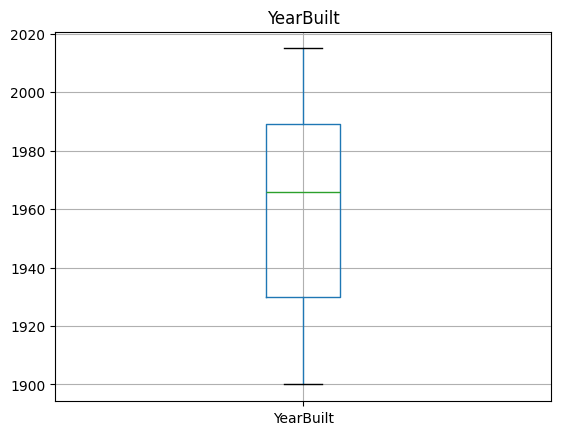

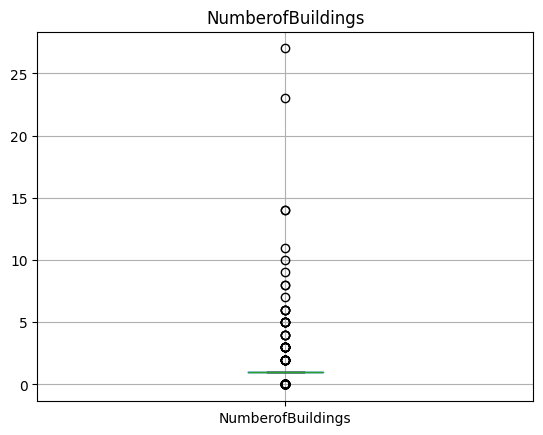

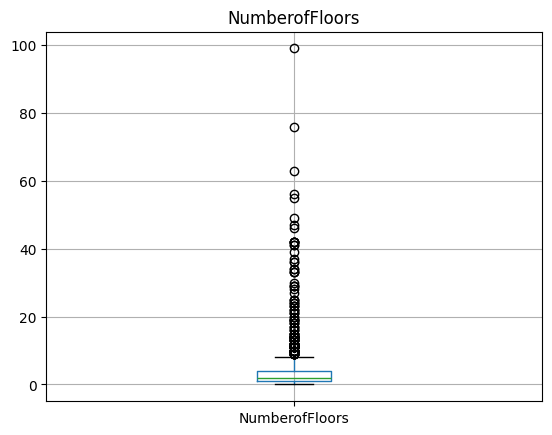

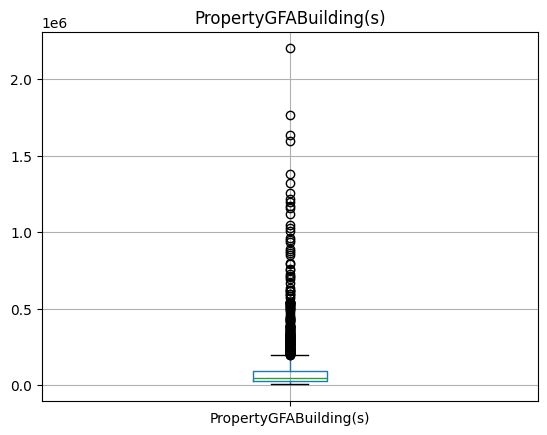

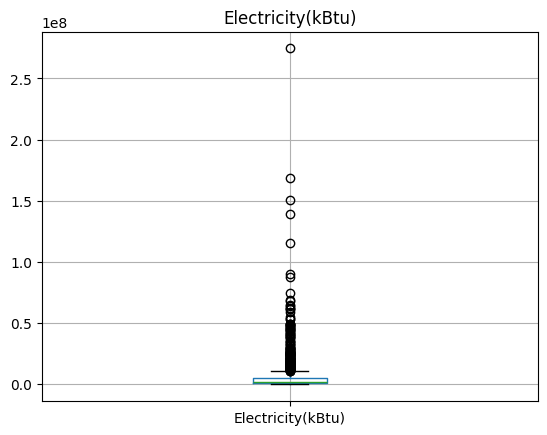

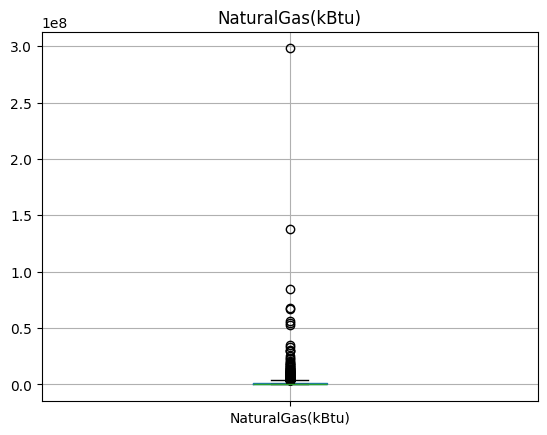

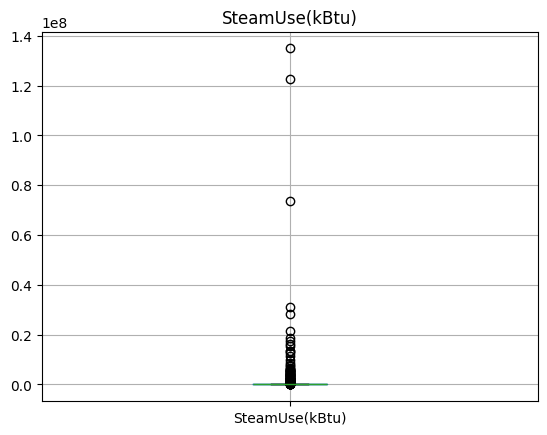

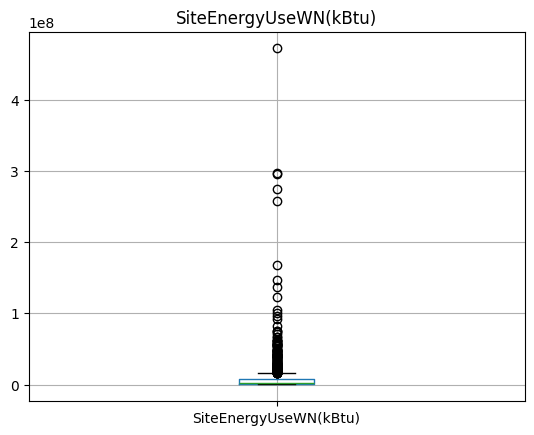

In [11]:
# Affichage du boxplot des colonnes numériques pour repérer d'autres outliers
num_cols = building_cons.select_dtypes(include='number').columns

for col in num_cols:
    plt.figure()
    building_cons.boxplot(column=col)
    plt.title(col)
    plt.show()

In [12]:
# Suppression des valeurs extrêmes pour le nombre de bâtiments, et correction des bâtiments dont la valeur est 0 
print(building_cons.shape)
building_cons=building_cons[building_cons['NumberofBuildings'] <= 20]
mask_valid = (
    (building_cons['NumberofBuildings'] == 0) &
    (building_cons['PropertyGFABuilding(s)'] > 0)  # bâtiment réel
)

building_cons.loc[mask_valid, 'NumberofBuildings'] = 1
print(building_cons.shape)

(1623, 10)
(1621, 10)


In [13]:
# Suppression des valeurs extrêmes pour le nombre d'étages
print(building_cons.shape)
building_cons=building_cons[building_cons['NumberofFloors'] <= 20]
print(building_cons.shape)

(1621, 10)
(1576, 10)


In [14]:
# Suppression des consommations électrique incohérentes
print(building_cons.shape)
building_cons=building_cons[building_cons['Electricity(kBtu)'] >= 0]
print(building_cons.shape)

(1576, 10)
(1575, 10)


In [15]:
# Suppression des lignes où toutes les énergies sont absentes
cols = ['SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)']
print(building_cons.shape)
building_cons=building_cons[building_cons[cols].ne(0).any(axis=1)]
print(building_cons.shape)

(1575, 10)
(1574, 10)


In [16]:
print(building_cons.shape)
#Calcul IQR
Q1 = building_cons['SiteEnergyUseWN(kBtu)'].quantile(0.25)
Q3 = building_cons['SiteEnergyUseWN(kBtu)'].quantile(0.75)
IQR = Q3 - Q1

borne_inf = Q1 - 1.5 * IQR
borne_sup = Q3 + 1.5 * IQR

# Identifier les outliers
outliers = building_cons[(building_cons['SiteEnergyUseWN(kBtu)'] < borne_inf) | (building_cons['SiteEnergyUseWN(kBtu)'] > borne_sup)]

# Supprimer les outliers
building_cons = building_cons[(building_cons['SiteEnergyUseWN(kBtu)'] >= borne_inf) & (building_cons['SiteEnergyUseWN(kBtu)'] <= borne_sup)]
print(building_cons.shape)

(1574, 10)
(1416, 10)


In [17]:
# Describe fin de l'analyse exploratoire
building_cons.describe()

,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFABuilding(s),Electricity(kBtu),NaturalGas(kBtu),SteamUse(kBtu),SiteEnergyUseWN(kBtu)
count,1416.00,1416.00,1416.00,1416.00,1416.00,1416.00,1416.00,1416.00
mean,1959.81,1.05,2.90,59444.34,2344048.89,988409.51,73513.78,3564235.71
std,32.66,0.40,2.42,53851.49,2503910.87,1438240.94,434324.96,3281763.91
min,1900.00,1.00,0.00,3636.00,0.00,0.00,0.00,58114.20
25%,1928.00,1.00,1.00,26792.50,666734.50,0.00,0.00,1245551.62
50%,1963.00,1.00,2.00,41122.50,1328257.50,478300.50,0.00,2299417.12
75%,1987.00,1.00,4.00,68188.00,3182728.50,1234390.25,0.00,4902021.88
max,2015.00,6.00,20.00,706176.00,14709149.00,11508035.00,5473370.50,14736775.00


In [18]:
# Début feature engineering
# Transformation des variables de consommation d'énergie, en feature qui détecte l'énergie utilisée
building_cons['UsesSteam'] = (building_cons['SteamUse(kBtu)'] > 0).astype(int)
building_cons['UsesElectricity'] = (building_cons['Electricity(kBtu)'] > 0).astype(int)
building_cons['UsesNaturalGas'] = (building_cons['NaturalGas(kBtu)'] > 0).astype(int)
cols_energy = ['SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)']
building_cons = building_cons.drop(columns=cols_energy)

In [19]:
# Création d'une variable BuildingAge qui remplace YearBuilt
building_cons["BuildingAge"] = 2025 - building_cons["YearBuilt"]
building_cons = building_cons.drop(columns=["YearBuilt"], errors="ignore")

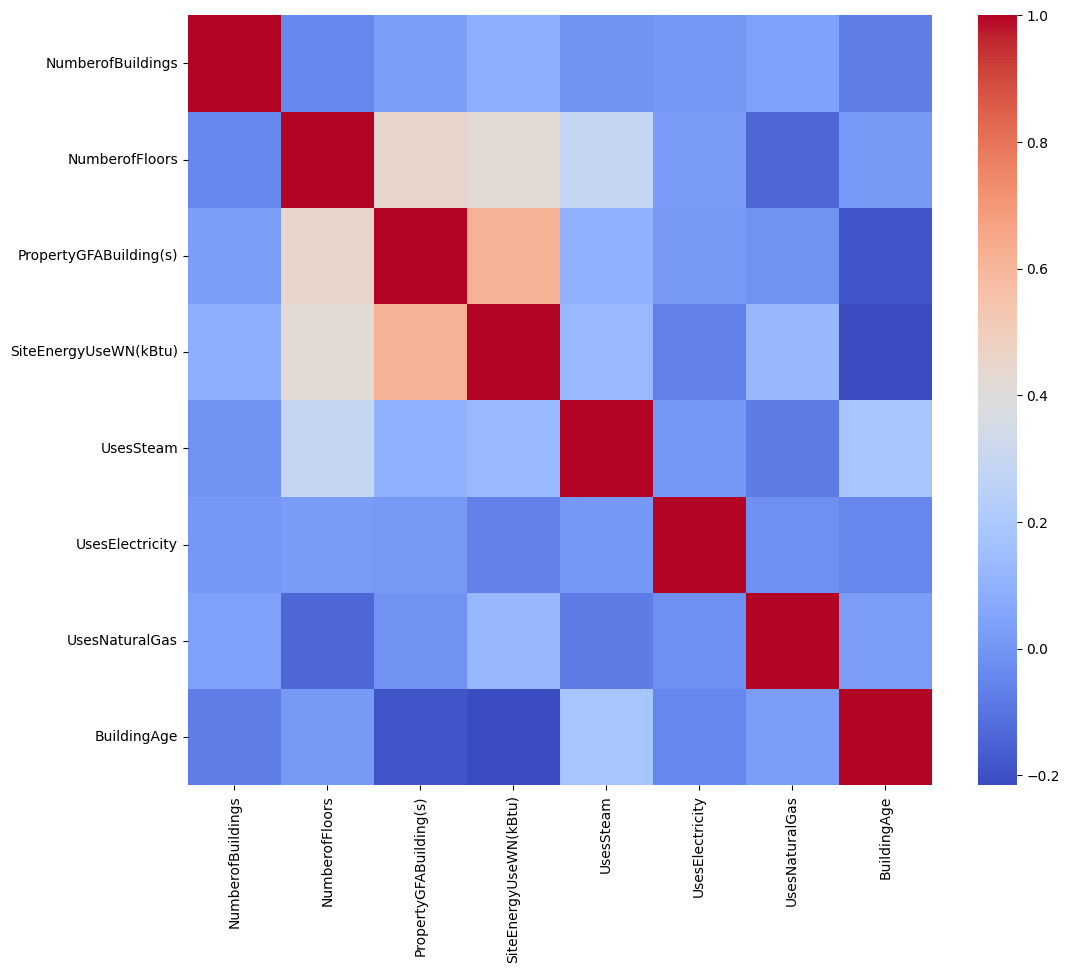

In [20]:
# Matrice de corrélation des features: Aucune paire de feature trop corrélée entre elle
import seaborn as sns
import matplotlib.pyplot as plt
num_building = building_cons.select_dtypes(include=["number"])
corr = num_building.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.show()

In [21]:
# Export du Dataset nettoyé sous forme de csv pour les prochaines étapes
building_cons.to_csv("building_features.csv", index=False)